In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files


In [3]:
uploaded = files.upload()

Saving shopping_trends_updated.csv to shopping_trends_updated.csv


In [20]:
df=pd.read_csv('shopping_trends_updated.csv')

In [21]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [22]:
df.shape

(3900, 18)

In [23]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [31]:
correlation_matrix = df.corr()

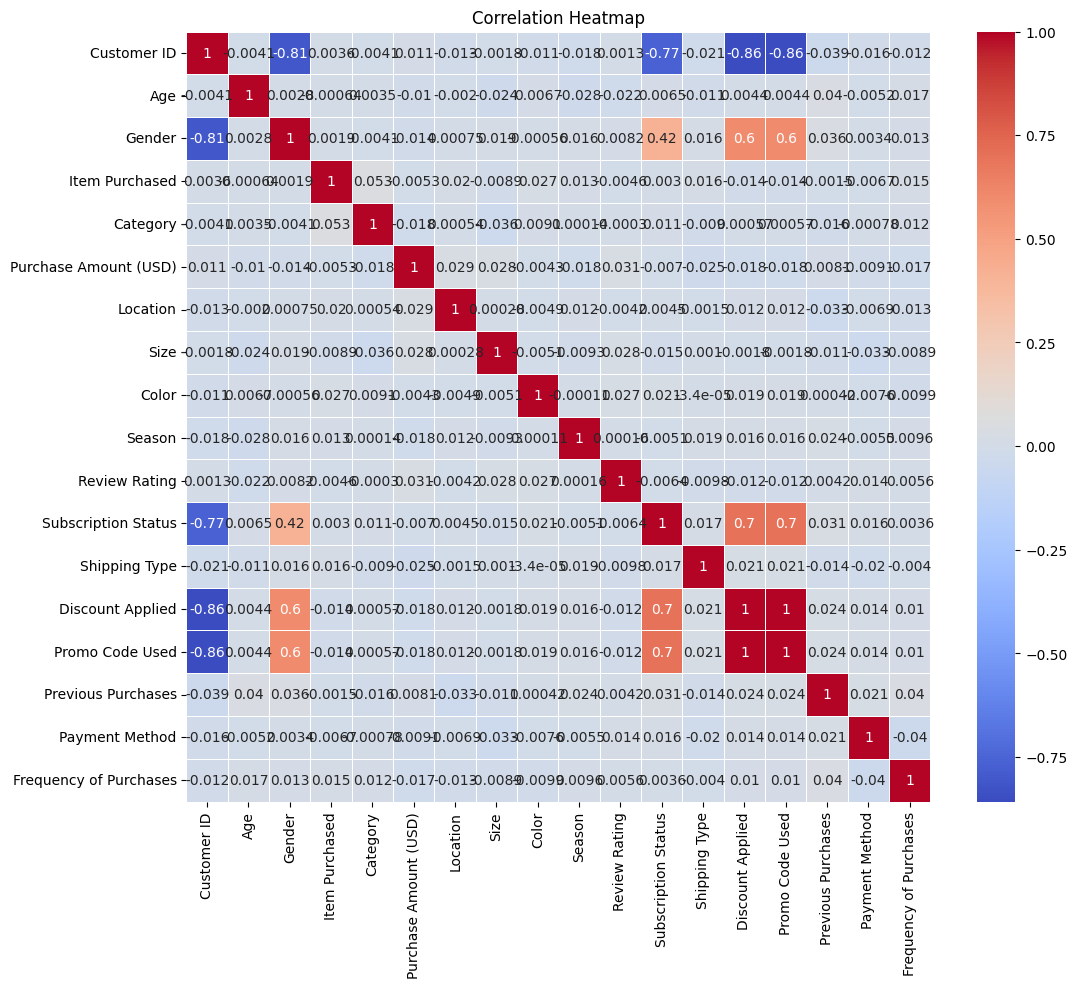

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

plt.title("Correlation Heatmap")
plt.show()

In [15]:
correlation_matrix.columns

Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [29]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0


In [36]:
X = df[['Age','Gender','Location','Payment Method','Frequency of Purchases','Discount Applied']] #Independant variables
y = df['Subscription Status']

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**use Lazypredict**

In [40]:
pip install lazypredict


In [41]:
from lazypredict.Supervised import LazyClassifier

In [42]:
clf = LazyClassifier()
clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:06<00:00,  4.35it/s]

[LightGBM] [Info] Number of positive: 717, number of negative: 2013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 2730, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262637 -> initscore=-1.032306
[LightGBM] [Info] Start training from score -1.032306


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 LinearSVC                          0.83               0.88     0.88      0.84   
 LinearDiscriminantAnalysis         0.83               0.88     0.88      0.84   
 BernoulliNB                        0.83               0.88     0.88      0.84   
 CalibratedClassifierCV             0.83               0.88     0.88      0.84   
 RidgeClassifierCV                  0.83               0.88     0.88      0.84   
 RidgeClassifier                    0.83               0.88     0.88      0.84   
 GaussianNB                         0.83               0.88     0.88      0.84   
 NearestCentroid                    0.83               0.88     0.88      0.84   
 LogisticRegression                 0.83               0.88     0.88      0.84   
 SVC                                0.83               0.88     0.88      0.84   
 NuSVC          

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
y_pred = rf_classifier.predict(X_test)

**Hyperparameter tuning**
**bold text**

In [50]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [52]:
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [53]:
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [54]:
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82
